In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path  = input('Input your data path here: ')

# Task 2: Clean and Preprocess data

## Task 2.1: Merge 12-month data

In [3]:
# Create a list contains all data frame (file csv month 1 to 12)
list_all_data_frame = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path +'/'+ file
        dataframe_1month = pd.read_csv(filepath)
        # Add data frame 1 month to list all data frame
        list_all_data_frame.append(dataframe_1month)
        # Merge all data frame in list
        mergered_df = pd.concat(list_all_data_frame)
        
        length_1month = len(dataframe_1month.index)
        all_length.append(length_1month)

In [4]:
# Check len data frame, in order not to miss data
if len(mergered_df) == sum(all_length):
    print('Not missing data')
else:
    print('Missing data')

Not missing data


In [5]:
# Create csv file name 'annualSales2019.csv', remove index 
mergered_df.to_csv('annualSales2019.csv',index =False)

## Task 2.2: Add 'Month' column

In [6]:
df  = mergered_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
# str[0:2] is the first and second char in 'Order Date'
df['Month']= df['Order Date'].str[0:2]
df['Month'].unique()

array(['03', '04', 'Or', nan, '05', '06', '01', '02', '07', '08', '09',
       '12', '11', '10'], dtype=object)

## Task 2.3: Get rid of 'nan' and 'or' value

In [8]:
# Get rid of 'nan'
df= df.dropna(how='all')
# Get rid of 'or'
df = df[df.Month!='Or']
print('Drop',len(mergered_df) - len(df), "'nan' and 'or'  values")

Drop 900 'nan' and 'or'  values


In [9]:
# Convert dataframe string to interger type
df.Month = pd.to_numeric(df.Month)

# Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month?

In [10]:
# Check Quantity Ordered type
df['Quantity Ordered'].describe()

count     185950
unique         9
top            1
freq      168552
Name: Quantity Ordered, dtype: object

In [11]:
# Check Price Each type
df['Price Each'].describe()

count     185950
unique        23
top        11.95
freq       21903
Name: Price Each, dtype: object

In [12]:
# Convert Quantity Ordered & Price Each column datatype from string to interger
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [13]:
# Sales = Quantity Ordered * Price Each
df_sales = df['Quantity Ordered'] * df['Price Each']
df_sales.head()

0    700.00
1     14.95
2     23.98
3     99.99
4    379.99
dtype: float64

In [14]:
# Insert column at index 4 with name 'Sales'
sales_index_column = 4
df.insert(sales_index_column,'Sales',df_sales)

In [15]:
def draw_bar_chart(x_axis,y_axis,x_name= None, y_name = None):
    plt.bar(x = x_axis, height = y_axis, color = 'green')
    plt.xticks(x_axis,rotation = 90)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

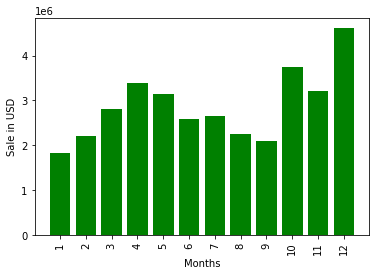

In [16]:
# Group and calculate sum sales each month
sales_value_month = df.groupby('Month').sum()['Sales']
months = sales_value_month.index
draw_bar_chart(months,sales_value_month,'Months','Sale in USD')

In [17]:
print('The best month for sales is',sales_value_month.idxmax())
print(sales_value_month.max(),'was earned that month')

The best month for sales is 12
4613443.34 was earned that month


## Task 3.2: What city has the best sales?

In [18]:
# Slice string pandas by condition
# Realize the city before the first ', '
city_index = 1
address_to_city = df['Purchase Address'].str.split(', ', expand =True)[city_index]
df['City'] = address_to_city
df['City']

0               Austin
1               Austin
2               Austin
3        San Francisco
4        San Francisco
             ...      
20374    San Francisco
20375      Los Angeles
20376    San Francisco
20377          Seattle
20378      Los Angeles
Name: City, Length: 185950, dtype: object

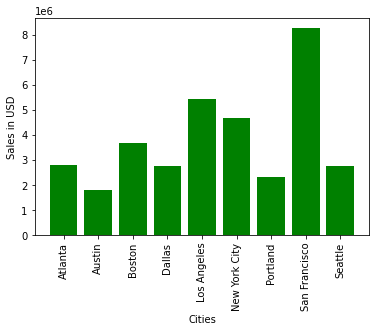

In [19]:
sales_value_city = df.groupby('City').sum()['Sales']
cities = sales_value_city.index
draw_bar_chart(cities,sales_value_city,'Cities','Sales in USD')

In [20]:
print(sales_value_city.idxmax(),"has the best sales.")

San Francisco has the best sales.


## Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [21]:
hour_index = 1
# Split datetime from Order Date
datetime_to_time = df['Order Date'].str.split(' ',expand = True)[hour_index]
# Split hour from datetime
df['Hours'] =datetime_to_time.str[0:2]
df['Hours']

0        20
1        20
2        20
3        05
4        00
         ..
20374    04
20375    22
20376    20
20377    17
20378    11
Name: Hours, Length: 185950, dtype: object

In [22]:
# Convert Hours column datatype to interger
df['Hours'] = pd.to_numeric(df['Hours'])

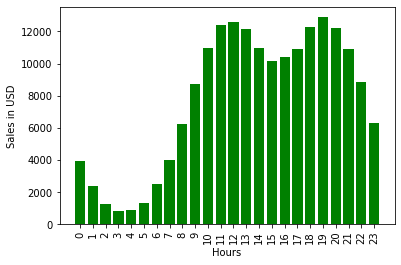

In [23]:
# Note in this question you need to figure out what time have much order not total sales
# So use count func instead of sum func here
sales_value_hour = df.groupby('Hours').count()['Sales']
hours  = sales_value_hour.index
draw_bar_chart(hours,sales_value_hour,'Hours','Sales in USD')

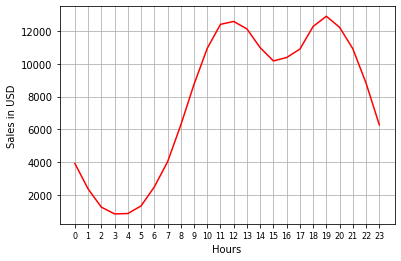

In [24]:
hours  = sales_value_hour.index
# Plot chart
plt.plot(hours, sales_value_hour,color = 'red')
plt.grid()
plt.xticks(hours, size = 8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()
# time

## Task 3.4: What products are most often sold together?

In [25]:
# How to find duplicates in pandas
df_dup = df[df['Order ID'].duplicated(keep=False)]

In [26]:
df_dup['All Products']= df_dup.groupby('Order ID')['Product'].apply(','.join)
# The All Products only return NaN because apply() return Dataframe but column need series
df_dup.head()

/tmp/ipykernel_59924/3071745704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']= df_dup.groupby('Order ID')['Product'].apply(','.join)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
0,162009,iPhone,1,700.00,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,20,NaN
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,20,NaN
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,20,NaN
30,162037,iPhone,1,700.00,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,Los Angeles,2,NaN
31,162037,Lightning Charging Cable,1,14.95,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,Los Angeles,2,NaN


In [27]:
# How to combine multiple row in one rowpandas

# Create a function for transform function in order to join values together
groupProduct = lambda product:  ', '.join(product)
# Use transform instead of apply
# transform() need function
df_dup['All Products']= df_dup.groupby('Order ID')['Product'].transform(groupProduct)


/tmp/ipykernel_59924/4132995550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']= df_dup.groupby('Order ID')['Product'].transform(groupProduct)


In [28]:
# How to count number of values in column pandas
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: All Products, dtype: int64

## Task 3.5: What product sold the most? Why do you think it sold the most?

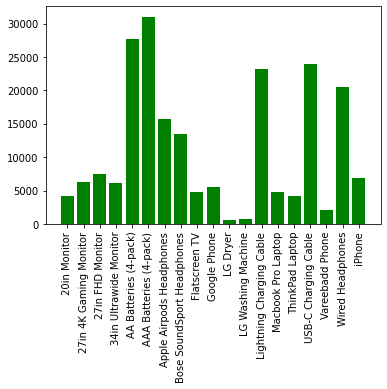

In [29]:
quantity= df.groupby('Product').sum()['Quantity Ordered']
product_list =quantity.index 
draw_bar_chart(product_list,quantity)

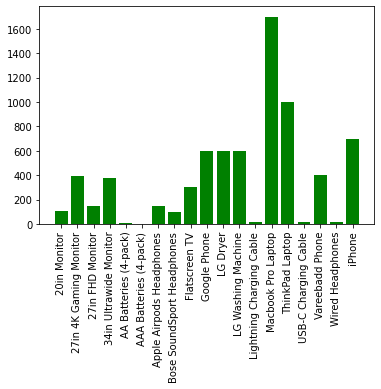

In [30]:
# Get price product
prices = df.groupby('Product').mean()['Price Each']
draw_bar_chart(product_list,prices)

In [31]:
print(quantity.idxmax(),'sold the most')

AAA Batteries (4-pack) sold the most
